In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)
from sklearn import metrics

In [3]:
df=pd.read_csv('data_icaller_1500.csv')
# df['ratio_in_contact']=df.in_contact/df.sum_call
# df['avg_duration']=0.0
# for i in df.index:
#     if (df.call_to[i]+df.call_in[i])>0:
#         df['avg_duration'][i]=df.duration[i]/(df.call_to[i]+df.call_in[i])
        
        

In [4]:
df_test=pd.read_csv('data_icaller_test.csv')
# df_test['ratio_in_contact']=df_test.in_contact/df_test.sum_call
# df_test['avg_duration']=0.0
# for i in df_test.index:
#     if (df_test.call_to[i]+df_test.call_in[i])>0:
#         df_test['avg_duration'][i]=df_test.duration[i]/(df_test.call_to[i]+df_test.call_in[i])

In [5]:
df.sample(10)

,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success,Spam,phone
976,1.0,0.0,0.0,0.0,303.0,0.0,302.969703,0.000000,0.000000,0,1.000000,0,84914608755
314,7.0,0.0,4.0,3.0,802.0,0.0,72.908428,0.000000,0.000000,14,0.428571,1,84932710282
542,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,0.000000,1,84899189703
1241,27.0,67.0,14.0,99.0,980.0,3106.0,23.902381,18.710832,0.811594,127,0.434783,0,84363446164
904,1.0,0.0,0.0,0.0,14.0,0.0,13.998600,0.000000,0.000000,1,1.000000,0,84967119006
337,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,0.000000,1,84909733208
94,2.0,0.0,0.0,0.0,37.0,0.0,18.499075,0.000000,0.000000,2,1.000000,1,84896689396
920,1.0,0.0,0.0,0.0,19.0,0.0,18.998100,0.000000,0.000000,0,1.000000,0,8234134227
1039,1.0,0.0,4.0,0.0,8.0,0.0,1.599968,0.000000,0.000000,5,0.200000,0,84896122989
1057,3.0,10.0,1.0,3.0,51.0,545.0,12.749681,41.922754,1.000000,14,0.764706,0,84898256705


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   call_to               1500 non-null   float64
 1   call_in               1500 non-null   float64
 2   call_to_miss          1500 non-null   float64
 3   call_in_miss          1500 non-null   float64
 4   duration_call_to      1500 non-null   float64
 5   duration_call_in      1500 non-null   float64
 6   avg_duration_call_to  1500 non-null   float64
 7   avg_duration_call_in  1500 non-null   float64
 8   avg_in_contact        1500 non-null   float64
 9   in_hour               1500 non-null   int64  
 10  avg_success           1500 non-null   float64
 11  Spam                  1500 non-null   int64  
 12  phone                 1500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 152.5+ KB


In [7]:
df.columns

Index(['call_to', 'call_in', 'call_to_miss', 'call_in_miss',
       'duration_call_to', 'duration_call_in', 'avg_duration_call_to',
       'avg_duration_call_in', 'avg_in_contact', 'in_hour', 'avg_success',
       'Spam', 'phone'],
      dtype='object')

In [8]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.model_selection import KFold, cross_val_score
# from xgboost import XGBRegressor

In [9]:
# def score_dataset(X, y, model=XGBRegressor()):
#     # Label encoding for categoricals
#     #
#     # Label encoding is good for XGBoost and RandomForest, but one-hot
#     # would be better for models like Lasso or Ridge. The `cat.codes`
#     # attribute holds the category levels.
#     for colname in X.select_dtypes(["category"]):
#         X[colname] = X[colname].cat.codes
#     # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
#     log_y = np.log(y)
#     score = cross_val_score(
#         model, X, log_y, cv=5, scoring="neg_mean_squared_error",
#     )
#     score = -1 * score.mean()
#     score = np.sqrt(score)
#     return score


In [10]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = X.dtypes == int
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [11]:
X = df.copy().drop(columns=['phone','call_in','call_to_miss','duration_call_in','avg_duration_call_to'])
y = X.pop("Spam")
mi_scores = make_mi_scores(X, y)
mi_scores

avg_in_contact          0.174676
avg_duration_call_in    0.139658
in_hour                 0.083167
avg_success             0.060061
call_in_miss            0.025940
call_to                 0.023362
duration_call_to        0.019238
Name: MI Scores, dtype: float64

In [12]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.0001]


In [13]:
X = drop_uninformative(X, mi_scores)
data=X.copy()
data['Spam']=y

In [14]:
# features = [ 'call_to', 'call_in',
#        'call_to_miss', 'call_in_miss','ratio_in_contact','duration_call_to_miss','pagerank','duration','duration_call_to', 'duration_call_in','avg.duration','Spam']
# feature_names = [ 'call_to', 'call_in',
#        'call_to_miss', 'call_in_miss','ratio_in_contact','duration_call_to_miss','duration','duration_call_to', 'duration_call_in','pagerank','avg.duration']
# # X = df[features]
# plt.subplots(figsize=(8, 5))
# sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
# plt.show()

In [15]:
#  sns.pairplot(df[features])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import binarize

import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
# X_unlabeled=df_test[X.columns]

# X_test=df_test[X.columns]
# y_test=df_test['Spam']

In [18]:
data.describe()

,call_to,call_in_miss,duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success,Spam
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,15.492667,7.522667,837.758667,17.133238,0.375371,35.580667,0.488931,0.395333
std,81.275000,23.880822,4157.260064,49.392335,0.445886,166.412821,0.345099,0.489085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.210526,0.000000
50%,1.000000,1.000000,42.000000,0.000000,0.000000,4.000000,0.500000,0.000000
75%,8.000000,4.000000,346.500000,20.305529,0.960310,23.000000,0.750000,1.000000
max,2333.000000,475.000000,113102.000000,895.455227,1.000000,4704.000000,1.000000,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   call_to               1500 non-null   float64
 1   call_in_miss          1500 non-null   float64
 2   duration_call_to      1500 non-null   float64
 3   avg_duration_call_in  1500 non-null   float64
 4   avg_in_contact        1500 non-null   float64
 5   in_hour               1500 non-null   int64  
 6   avg_success           1500 non-null   float64
 7   Spam                  1500 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 93.9 KB


In [20]:
# data.avg_duration=np.log(data['avg_duration'])

In [21]:
# plt.hist(x = [(data[data['Spam']==1]['duration_call_to']), (data[data['Spam']==0]['duration_call_to'])], 
#          stacked=True, color = ['g','r'],label = ['Spam','Not'])

In [22]:
# a = sns.FacetGrid( data, hue = 'Spam', aspect=4 )
# a.map(sns.kdeplot, 'ratio_in_contact', shade= True )
# a.set(xlim=(0 , data['ratio_in_contact'].max()))
# a.add_legend()

In [23]:
#pair plots of entire dataset
# pp = sns.pairplot(data, hue = 'Spam', palette = 'deep', size=, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=100) )
# pp.set(xticklabels=[])

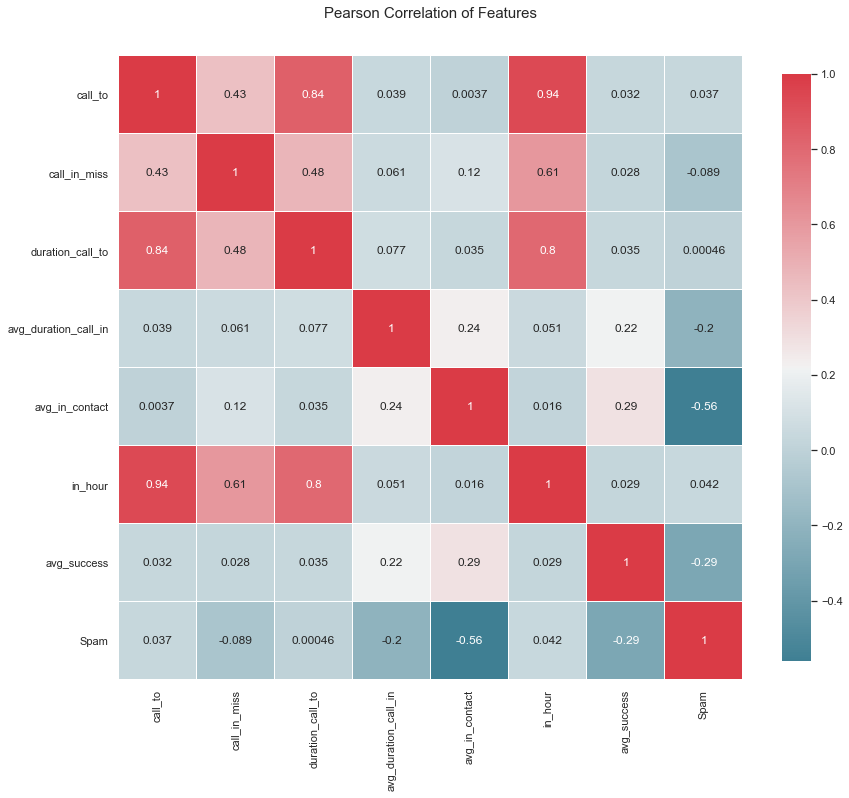

In [24]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

In [25]:
# sns.swarmplot(x=data['Spam'],
#               y=data['call_to'])

In [26]:
# sns.swarmplot(x=data['Spam'],
#               y=data['duration_call_to'])

In [27]:
class LR:

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def loss_function(self, y_pred, y_test):
        return - np.sum(y_test * np.log(y_pred)  + (1 - y_test)*np.log(1 - y_pred))
        
    def fit(self, X, y, epochs = 30, tol=1e-4, learning_rate = 0.05):
        X = np.array(X)
        y = np.array(y)
        num_attr = X.shape[1]
        m = X.shape[0]
        self.weights = np.random.randn(num_attr + 1, 1)
        ones = np.ones([m, 1])
        X = np.concatenate((ones, X), axis = 1)
        y.shape = (y.size, 1)
        a = []
        for i in range(epochs):
            z = np.dot(X, self.weights)
            z = self.sigmoid(z)            
            grad = np.zeros([num_attr + 1, 1])
            for j in range(num_attr + 1):    
                b = X.T[j]
                b.shape = (b.size, 1)
                grad[j] = np.sum((z - y) * b) 
            self.weights = self.weights - learning_rate*grad
           
        print(self.weights)
            
    def predict(self, data, threshold = 0.5):
         m = data.shape[0]
         ones = np.ones([m, 1])
         data = np.concatenate((ones, data), axis = 1)
         z = np.dot(data, self.weights)
         z = self.sigmoid(z)
         predict = np.uint8(np.zeros(z.shape))
         for i in range(z.shape[0]):
             if(z[i] >= threshold):  
                 predict[i] = 1
         return predict

In [28]:
train_X = X_train 
train_Y = y_train
test_X = X_test
test_Y = y_test

a = LR()
a.fit(train_X, train_Y, epochs = 300, learning_rate = 0.00005)
    
    
predictions_test = a.predict(test_X)

accuracy_test = metrics.accuracy_score(predictions_test, test_Y)
f1_score_test = metrics.f1_score(predictions_test, test_Y)
precision_test = metrics.precision_score(predictions_test, test_Y)
recall_test = metrics.recall_score(predictions_test, test_Y)

print("Accuracy: ", accuracy_test)
print("F1 score: ", f1_score_test)
print("Precision: ", precision_test)
print("Recall: ", recall_test)

[[ -0.59200774]
 [ 19.02337118]
 [-25.75338334]
 [  0.60362701]
 [-31.61100578]
 [ -1.39122601]
 [ 24.80639889]
 [  0.28871997]]
Accuracy:  0.6033333333333334
F1 score:  0.6246056782334385
Precision:  0.9
Recall:  0.4782608695652174


In [29]:
# from mlxtend.preprocessing import minmax_scaling


In [30]:
logreg = LogisticRegression()
h2=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_LR = logreg.predict(X_test)
y_p_LR=logreg.predict_proba(X_test)
THRESHOLD=0.5
# y_pred_LR  = binarize(y_p_LR[:,1].reshape(-1, 1), THRESHOLD).ravel()
# Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
y_pred_train=logreg.predict(X_train)

accuracy_train_LR = round(metrics.accuracy_score(y_pred_train, y_train),3)
accuracy_LR = round(metrics.accuracy_score(y_pred_LR, y_test),3)
f1_score_LR = round(metrics.f1_score(y_pred_LR, y_test),3)
precision_LR = round(metrics.precision_score(y_pred_LR, y_test),3)
recall_LR = round(metrics.recall_score(y_pred_LR, y_test),3)
                          
print("Accuracy train LR: ", accuracy_train_LR)
print("Accuracy ttest LR: ", accuracy_LR)
print("F1 score LR: ", f1_score_LR)
print("Precision LR: ", precision_LR)
print("Recall LR: ", recall_LR)
print("Sum Spam: ", y_pred_LR.sum())
# print(y_p_LR[998])
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



Accuracy train LR:  0.798
Accuracy ttest LR:  0.827
F1 score LR:  0.789
Precision LR:  0.882
Recall LR:  0.713
Sum Spam:  136


Weight,Feature
0.1600 ± 0.0586,avg_in_contact
0.0620 ± 0.0262,call_in_miss
0.0520 ± 0.0339,avg_duration_call_in
0.0487 ± 0.0306,in_hour
0.0273 ± 0.0225,call_to
0.0087 ± 0.0090,avg_success
0.0053 ± 0.0053,duration_call_to


In [31]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
y_pred_train=svc.predict(X_train)

# y_p_svc=svc.predict_proba(X_test)

# y_pred_svc  = binarize(y_p_svc[:,1].reshape(-1, 1), THRESHOLD).ravel()


accuracy_train_SVC = round(metrics.accuracy_score(y_pred_train, y_train),3)
accuracy_SVC = round(metrics.accuracy_score(y_pred_svc, y_test),3)
f1_score_SVC = round(metrics.f1_score(y_pred_svc, y_test),3)
precision_SVC = round(metrics.precision_score(y_pred_svc, y_test),3)
recall_SVC = round(metrics.recall_score(y_pred_svc, y_test),3)

print("Accuracy train SVC: ", accuracy_train_SVC)
print("Accuracy SVC: ", accuracy_SVC)
print("F1 score SVC: ", f1_score_SVC)
print("Precision SVC: ", precision_SVC)
print("Recall SVC: ", recall_SVC)
print("Sum Spam: ", y_pred_svc.sum())

perm = PermutationImportance(svc, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

# print(y_pred )
# print(y_p)


Accuracy train SVC:  0.706
Accuracy SVC:  0.757
F1 score SVC:  0.552
Precision SVC:  0.409
Recall SVC:  0.849
Sum Spam:  53


Weight,Feature
0.1293 ± 0.0451,duration_call_to
0.0740 ± 0.0236,in_hour
0.0653 ± 0.0241,call_to
0.0640 ± 0.0254,avg_duration_call_in
0.0567 ± 0.0256,call_in_miss
0.0540 ± 0.0275,avg_in_contact
0.0407 ± 0.0265,avg_success


In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
h1=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
y_p_rf=random_forest.predict_proba(X_test)
y_pred_train=random_forest.predict(X_train)

y_pred_rf  = binarize(y_p_rf[:,1].reshape(-1, 1), THRESHOLD).ravel()


accuracy_train_RF = round(metrics.accuracy_score(y_pred_train, y_train),3)
accuracy_RF = round(metrics.accuracy_score(y_pred_rf, y_test),3)
f1_score_RF = round(metrics.f1_score(y_pred_rf, y_test),3)
precision_RF = round(metrics.precision_score(y_pred_rf, y_test),3)
recall_RF = round(metrics.recall_score(y_pred_rf, y_test),3)

print("Accuracy train RF: ", accuracy_train_RF)
print("Accuracy RF : ", accuracy_RF)
print("F1 score RF: ", f1_score_RF)
print("Precision RF: ", precision_RF)
print("Recall RF: ", recall_RF)
print("Sum Spam: ", y_pred_rf.sum())
# print(y_p_rf[998])

perm = PermutationImportance(random_forest, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
# print(y_pred )
# print(y_p)


Accuracy train RF:  0.947
Accuracy RF :  0.837
F1 score RF:  0.766
Precision RF:  0.727
Recall RF:  0.808
Sum Spam:  99.0


Weight,Feature
0.0953 ± 0.0507,avg_in_contact
0.0933 ± 0.0289,avg_duration_call_in
0.0313 ± 0.0300,in_hour
0.0280 ± 0.0217,call_in_miss
-0.0033 ± 0.0256,avg_success
-0.0100 ± 0.0184,call_to
-0.0140 ± 0.0078,duration_call_to


In [33]:

knn = KNeighborsClassifier(n_neighbors = 10,  weights = 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_p_knn=knn.predict_proba(X_test)


y_pred_knn  = binarize(y_p_knn[:,1].reshape(-1, 1), THRESHOLD).ravel()


accuracy_KNN = round(metrics.accuracy_score(y_pred_knn, y_test),3)
f1_score_KNN = round(metrics.f1_score(y_pred_knn, y_test),3)
precision_KNN = round(metrics.precision_score(y_pred_knn, y_test),3)
recall_KNN = round(metrics.recall_score(y_pred_knn, y_test),3)

print("Accuracy KNN: ", accuracy_KNN)
print("F1 score KNN: ", f1_score_KNN)
print("Precision KNN: ", precision_KNN)
print("Recall KNN: ", recall_KNN)
print("Sum Spam: ", y_pred_knn.sum())

perm = PermutationImportance(knn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



Accuracy KNN:  0.783
F1 score KNN:  0.689
Precision KNN:  0.655
Recall KNN:  0.727
Sum Spam:  99.0


Weight,Feature
0.1340 ± 0.0181,avg_duration_call_in
0.1120 ± 0.0317,duration_call_to
0.1093 ± 0.0459,in_hour
0.0360 ± 0.0181,call_in_miss
0.0347 ± 0.0241,call_to
0.0193 ± 0.0160,avg_in_contact
-0.0067 ± 0.0060,avg_success


In [34]:
gaussian = MultinomialNB()
gaussian.fit(X_train, y_train)

y_pred_NB = gaussian.predict(X_test)
y_p_NB=gaussian.predict_proba(X_test)
THRESHOLD=0.5
y_pred_NB  = binarize(y_p_NB[:,1].reshape(-1, 1), THRESHOLD).ravel()


accuracy_NB = round(metrics.accuracy_score(y_pred_NB, y_test),3)
f1_score_NB = round(metrics.f1_score(y_pred_NB, y_test),3)
precision_NB = round(metrics.precision_score(y_pred_NB, y_test),3)
recall_NB = round(metrics.recall_score(y_pred_NB, y_test),3)

print("Accuracy NB: ", accuracy_NB)
print("F1 score NB: ", f1_score_NB)
print("Precision NB: ", precision_NB)
print("Recall NB: ", recall_NB)
print("Sum Spam: ", y_pred_NB.sum())

perm = PermutationImportance(knn, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



Accuracy NB:  0.73
F1 score NB:  0.646
Precision NB:  0.673
Recall NB:  0.622
Sum Spam:  119.0


Weight,Feature
0.1340 ± 0.0181,avg_duration_call_in
0.1120 ± 0.0317,duration_call_to
0.1093 ± 0.0459,in_hour
0.0360 ± 0.0181,call_in_miss
0.0347 ± 0.0241,call_to
0.0193 ± 0.0160,avg_in_contact
-0.0067 ± 0.0060,avg_success


In [35]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'KNN', 'LinearSVC', 
              'Random Forest', 'Naive Bayes'],
    'Score': [accuracy_LR, accuracy_KNN, accuracy_SVC, 
              accuracy_RF,accuracy_NB]
              })
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.837
0,LogisticRegression,0.827
1,KNN,0.783
2,LinearSVC,0.757
4,Naive Bayes,0.730


In [36]:
# from matplotlib import pyplot as plt
# from pdpbox import pdp, get_dataset, info_plots

# # Create the data that we will plot
# pdp_Spam = pdp.pdp_isolate(model=random_forest, dataset=X_test, model_features=features, feature='Spam')

# # plot it
# pdp.pdp_plot(pdp_goals, 'Spam')
# plt.show()

In [37]:
# df_test.loc[df_test.Spam==1].info()

In [38]:
y_test.sum()

110

In [39]:
sum(y_pred_NB-y_test)

9.0

In [40]:
def gen_new_data(h,X_unlabeled,THRESHOLD,feature):


    ## REDUNDANT CODE (TRY TO IMPROVE)

    ######
    
    y_p=h.predict_proba(X_unlabeled[feature])
    y_pred1  = binarize(y_p[:,1].reshape(-1, 1), THRESHOLD).ravel()
    X_labeled1=X_unlabeled.copy()
    X_labeled1['Spam']=y_pred1
    X_Spam = X_labeled1.loc[X_labeled1['Spam']==1]
    n_spam=X_Spam.shape[0]
    
    y_pred2  = binarize(y_p[:,1].reshape(-1, 1), 1-THRESHOLD).ravel()
    X_labeled2=X_unlabeled.copy()
    X_labeled2['Spam']=y_pred2
    X_not_Spam=X_labeled2.loc[X_labeled2['Spam']==0]
    n_not_spam=X_not_Spam.shape[0]
    
    n_new=min(n_not_spam,n_spam)
    X_Spam_new=X_Spam.sample(n_new)
    X_not_Spam_new=X_not_Spam.sample(n_new)
    
    X_new=pd.concat([X_Spam_new, X_not_Spam_new], axis=0, ignore_index=False)
    y_new= X_new.pop("Spam")
    
    X_unlabeled=X_unlabeled.drop(X_new.index, axis=0)
#     print(X_unlabeled.shape)
    return X_new, y_new, X_unlabeled

In [41]:
def cotraining(h1,h2,X_unlabeled,k):
    feature_1=['type', 'in_contact', 'duration', 'call_to', 'call_in', 'call_to_miss',
       'call_in_miss']
    feature_2=['duration_call_to', 'duration_call_in',
       'duration_call_to_miss', 'sum_call', 'ratio_in_contact']
    h1.fit(X_train[feature_1],y_train)
    h2.fit(X_train[feature_2],y_train)

    acc1=[h1.score(X_test[feature_1],y_test)]
    acc2=[h2.score(X_test[feature_2],y_test)]
    counter=0
    X1=X_train.copy()
    X2=X_train.copy()
    y1=y_train.copy()
    y2=y_train.copy()
    

    while counter < k:

        #generating new-labels(actually indices corresponding to labels)
        X_new1, y_new1,X_unlabeled =gen_new_data(h1,X_unlabeled,THRESHOLD=0.995,feature=feature_1)
        X_new2, y_new2,X_unlabeled =gen_new_data(h2,X_unlabeled,THRESHOLD=0.995,feature=feature_2)
        X1=pd.concat([X_new1, X1], axis=0)
        print(X1.shape)
        y1=pd.concat([y_new1, y1], axis=0)
        X2=pd.concat([X_new2, X2], axis=0)
        y2=pd.concat([y_new2, y2], axis=0)
        
        #fitting new-datapoints
        h1.fit(X2[feature_1],y2)
        h2.fit(X1[feature_2],y1)
    
        #Keeping track of accuracy
        acc1.append(h1.score(X_test[feature_1],y_test))
        acc2.append(h2.score(X_test[feature_2],y_test))
        counter+=1
    return acc1,acc2,X1,y1,X2,y2,X_unlabeled

In [42]:
acc1,acc2,X1,y1,X2,y2,X_unlabeled=cotraining(h1,h2,X_unlabeled,k=2)

NameError: name 'X_unlabeled' is not defined

In [ ]:
X_unlabeled

In [ ]:
X_train

In [ ]:
X_unlabeled

In [ ]:
y1

In [ ]:
X1

In [ ]:
X2

In [ ]:
y2

In [ ]:
acc1

In [ ]:
acc2


In [ ]:
feature_1=['type', 'in_contact', 'duration', 'call_to', 'call_in', 'call_to_miss',
       'call_in_miss']
feature_2=['duration_call_to', 'duration_call_in',
       'duration_call_to_miss', 'sum_call', 'ratio_in_contact']

In [ ]:
X_train.shape[1]

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(26, activation='relu', input_shape=[X_train.shape[1]]),
#     layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(13, activation='relu'),
#     layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(1),
])

In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=500)

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
 model.evaluate(X_test, y_test)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=460,
    epochs=500,
     callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
X_train.